In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install --upgrade jax jaxlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 MB 10.4 MB/s eta 0:00:00
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.4.23+cuda12.cudnn89
    Uninstalling jaxlib-0.4.23+cuda12.cudnn89:
      Successfully uninstalled jaxlib-0.4.23+cuda12.cudnn89
  Attempting uninstall: jax
    Found existing installation: jax 0.4.23
    Uninstalling jax-0.4.23:
      Successfully uninstalled jax-0.4.23


In [2]:
import zipfile
import os
from io import BytesIO  # reconhecer numeros binarios e converter
from PIL import Image
import matplotlib.pyplot as plt  # plotar graficos
import os  # SO do computador
import shutil  # para manipulação de arquivos e diretorios
import pandas as pd
from sklearn.preprocessing import StandardScaler  # padronizar os dados
import tensorflow as tf
import numpy as np
import matplotlib.image as mpimg
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from os.path import join
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
import numpy as np
import os, sys
from scipy import ndimage
import cv2
import matplotlib.pyplot as plt
import itertools
import scipy.stats
import tensorflow as tf
from keras import applications, optimizers, Input
from keras.models import Sequential, Model
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils.multiclass import unique_labels

zip_path = '/content/drive/MyDrive/redes/dataSet_colorido_libras.zip'
extract_path = '/content/dataSet_colorido_libras'

# Extrair o conteúdo do arquivo ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Listar os arquivos no diretório de extração
extracted_files = os.listdir(extract_path)
print(f'Arquivos extraídos: {extracted_files}')


Arquivos extraídos: ['dataSet_colorido_libras']


In [3]:
folder = '/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train'
#mudei essas linhas de baixo pois estava em 120
image_width = 120
image_height = 213
nova_altura = 213
nova_largura = 120
channels = 3

train_files = []
i=0
for image in ['bus_renamed', 'bank_renamed', 'car_renamed', 'formation_renamed', 'hospital_renamed','I_renamed', 'man_renamed', 'motorcycle_renamed', 'my_renamed', 'supermarket_renamed', 'we_renamed',
             'woman_renamed', 'you_renamed', 'you (plural)_renamed', 'your_renamed']:
    onlyfiles = [f for f in os.listdir(folder + '/' + str(image)) if os.path.isfile(os.path.join(folder + '/' + str(image), f))]
    for _file in onlyfiles:
        train_files.append(_file)

dataset = np.ndarray(shape=(len(train_files), image_height, image_width, channels),
                     dtype=np.float32)
y_dataset = []

i = 0
for image in ['bus_renamed', 'bank_renamed', 'car_renamed', 'formation_renamed', 'hospital_renamed','I_renamed', 'man_renamed', 'motorcycle_renamed', 'my_renamed', 'supermarket_renamed', 'we_renamed',
             'woman_renamed', 'you_renamed', 'you (plural)_renamed', 'your_renamed']:
    onlyfiles = [f for f in os.listdir(folder + '/' + str(image)) if os.path.isfile(os.path.join(folder + '/' + str(image), f))]
    for _file in onlyfiles:
        img = load_img(folder + '/' +  str(image) + '/' + _file)  # this is a PIL image
        img.thumbnail((image_width, image_height))
        img = cv2.resize(img_to_array(img) , (nova_largura, nova_altura))
        x = np.array(img)
        dataset[i] = x
        mapping = {'bus_renamed': 0 , 'bank_renamed': 1 , 'car_renamed' : 2 , 'formation_renamed': 3 , 'hospital_renamed' : 4 ,'I_renamed' : 5 , 'man_renamed' : 6 , 'motorcycle_renamed' : 7 , 'my_renamed' : 8 , 'supermarket_renamed' : 9 , 'we_renamed' : 10 ,
             'woman_renamed'  : 11 , 'you_renamed' : 12 , 'you (plural)_renamed' : 13  , 'your_renamed' : 14 }
        y_dataset.append(mapping[image])
        i += 1
        if i == 500:
            print("%d images to array" % i)
            break
print("All images to array!")


500 images to array
All images to array!


In [4]:
dataset = dataset.astype('float32')
dataset /= 255

In [5]:
# categorical values
n_classes = len(set(y_dataset))
print(n_classes)
y_dataset_ = to_categorical(y_dataset, n_classes)

15


In [6]:
# Trim dataset to match the size of y_dataset_
dataset_trimmed = dataset[:len(y_dataset_)]
# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(dataset_trimmed, y_dataset_, test_size=0.2)
print("Train set size: {0}, Test set size: {1}".format(len(X_train), len(X_test)))

Train set size: 5716, Test set size: 1430


In [7]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/redes/Cópia de NEWmodel.h5')

In [8]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 213, 120, 3)       12        
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 213, 120, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2  (None, 106, 60, 256)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 106, 60, 256)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 106, 60, 128)      295040    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 30, 128)       0

In [9]:
history = pd.read_csv('/content/drive/MyDrive/redes/Cópia de NEWhistorico.csv')
history.head()

,Unnamed: 0,loss,accuracy,val_loss,val_accuracy
0,0,2.245475,0.578084,2.680040,0.591783
1,1,1.183073,0.627734,2.286941,0.606643
2,2,0.940913,0.680009,1.155140,0.675699
3,3,0.806418,0.717629,0.801623,0.775350
4,4,0.695591,0.758530,0.625369,0.829545


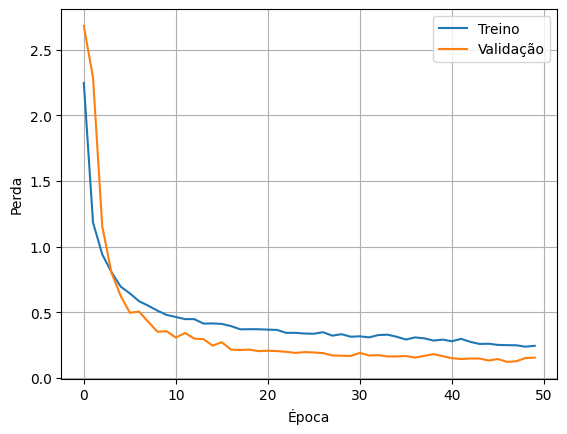

In [10]:
# Visualizar a perda durante o treinamento
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend(['Treino', 'Validação'], loc='upper right')
plt.grid()
plt.show()

In [11]:
preds = new_model.predict(X_test)

45/45 [==============================] - 7s 70ms/step


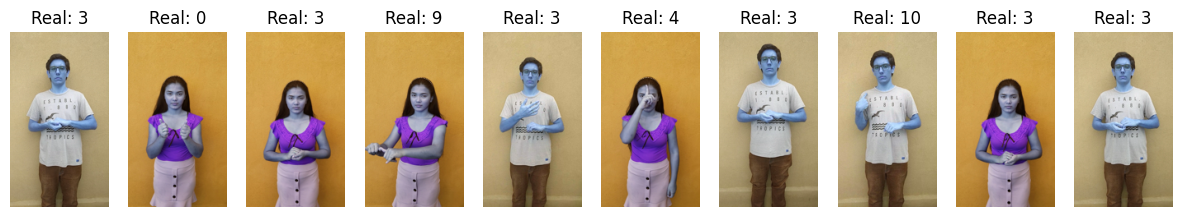

In [12]:
totals_images = 10  # Alterado para exibir apenas 5 imagens
for total in range(1):  # Agora o loop itera apenas 2 vezes para exibir 5 imagens
    plt.figure(figsize=(15,15))
    for i in range(totals_images*total, totals_images*(total+1)):
        plt.subplot(1, totals_images, i + 1 - totals_images*total)
        plt.imshow(cv2.cvtColor(X_test[i], cv2.COLOR_BGR2RGB), cmap='gray')
        plt.title('Real: {}'.format(np.argmax(y_test[i]), np.argmax(preds[i])))
        plt.axis('off')
    plt.show()


In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Classe Real')
    plt.xlabel('Classe Predita')

In [14]:
# Convert one-hot encoded labels back to class indices
y_test_indices = [np.argmax(x) for x in y_test]
preds_indices = [np.argmax(x) for x in preds]

# Find unique values in y_test_ and preds_
unique_y_test = set(y_test_indices)
unique_preds = set(preds_indices)

# Find the difference in unique values
diff_y_test = unique_y_test - unique_preds
diff_preds = unique_preds - unique_y_test

# Remove extra unique values
for value in diff_y_test:
    y_test_indices = [x for x in y_test_indices if x != value]

for value in diff_preds:
    preds_indices = [x for x in preds_indices if x != value]


In [ ]:
print(np.unique(y_test_indices, return_counts=True))

(array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), array([ 62,  52, 861,  49,  23,  36,  59,  36,  54,  57,  28,  32,  42,
        37]))


In [ ]:
print(np.unique(preds_indices, return_counts=True))

(array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), array([ 63,  53, 865,  48,  22,  41,  58,  35,  55,  56,  26,  31,  40,
        37]))


In [ ]:
print(preds_indices)

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 13, 3, 3, 3, 3, 3, 8, 3, 7, 7, 4, 3, 0, 3, 3, 11, 3, 3, 10, 3, 3, 3, 9, 0, 3, 3, 3, 3, 9, 3, 1, 3, 3, 9, 0, 3, 3, 6, 9, 3, 3, 14, 9, 3, 10, 10, 3, 3, 3, 10, 3, 3, 10, 5, 3, 3, 0, 3, 3, 3, 6, 3, 0, 3, 3, 3, 3, 1, 3, 7, 3, 0, 3, 14, 10, 10, 3, 14, 3, 4, 12, 3, 7, 3, 3, 7, 7, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 5, 3, 3, 8, 5, 3, 0, 3, 7, 1, 7, 8, 3, 9, 3, 10, 7, 3, 3, 3, 3, 3, 3, 3, 4, 4, 1, 3, 13, 3, 12, 4, 3, 3, 3, 3, 3, 3, 0, 3, 9, 12, 3, 3, 3, 5, 3, 3, 4, 3, 3, 3, 11, 3, 8, 4, 3, 3, 3, 11, 3, 5, 0, 8, 7, 4, 9, 3, 3, 9, 3, 9, 3, 9, 4, 3, 3, 7, 3, 3, 3, 3, 8, 0, 14, 4, 3, 0, 3, 3, 10, 3, 3, 3, 3, 3, 3, 3, 8, 3, 3, 3, 3, 3, 9, 9, 3, 14, 4, 5, 3, 3, 8, 3, 3, 3, 3, 3, 3, 11, 3, 3, 1, 7, 3, 3, 3, 3, 12, 3, 3, 7, 0, 3, 3, 13, 3, 1, 12, 13, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 8, 3, 8, 13, 1, 11, 4, 12, 1, 3, 3, 3, 7, 3, 3, 3, 3, 3, 3, 3, 6, 3, 10, 3, 0, 3, 9, 3, 3, 3, 3, 14, 3, 3, 6, 3, 4, 9, 8, 1, 4, 3, 3, 3, 6, 3, 3, 0, 9, 3, 7, 9, 3, 1

In [ ]:
def remover_ocorrencias(lista, valor, numero):
    count = 0
    index = 0
    while count < numero:
        try:
            lista.remove(valor)
            count += 1
        except ValueError:
            break
    return lista

In [ ]:
new_pred = remover_ocorrencias(lista=preds_indices, valor=3, numero=750)

In [ ]:
print(np.unique(new_pred, return_counts=True))

(array([ 0,  1,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), array([63, 53, 48, 22, 41, 58, 35, 55, 56, 26, 31, 40, 37]))


In [ ]:
new_y_test = remover_ocorrencias(lista=y_test_indices, valor=3, numero=750)

In [ ]:
len(new_y_test)

567

In [ ]:
len(new_pred)

565

In [ ]:
new_y_test = new_y_test[:len(new_pred)]

Confusion matrix, without normalization
[[23  4  3  2  2  4  1  6  3  2  3  2  7]
 [ 2 22  1  1  1  8  3  3  2  2  1  4  2]
 [ 2  2 19  1  2  3  1  3  1  7  2  3  3]
 [ 3  3  2  9  1  0  1  1  0  0  0  0  2]
 [ 3  0  3  1 18  2  2  2  0  1  0  3  0]
 [ 5  4  4  1  4 25  4  1  5  0  4  2  0]
 [ 1  2  3  3  3  2  9  5  2  1  1  3  1]
 [ 4  2  2  0  0  5  3 23  4  1  3  3  4]
 [11  5  0  0  3  3  1  5 21  0  2  3  3]
 [ 2  2  1  3  1  1  1  1  6  7  2  1  0]
 [ 2  2  3  1  0  1  3  2  3  1 11  1  2]
 [ 3  3  3  0  3  2  4  1  2  2  2 14  3]
 [ 2  2  4  0  3  2  2  2  7  2  0  1 10]]


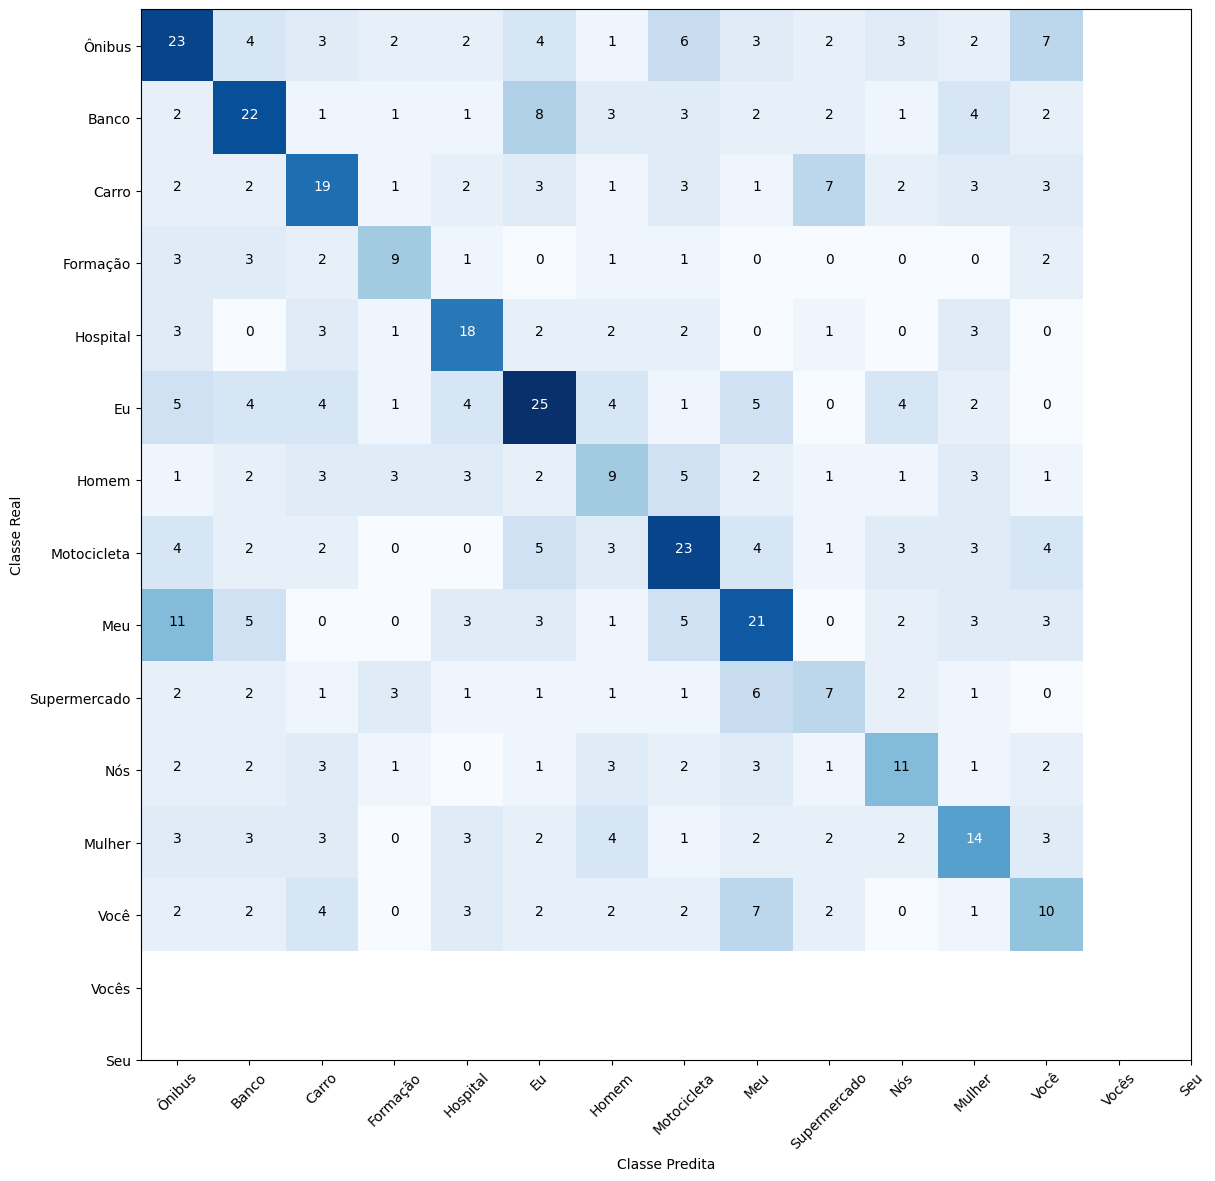

In [ ]:

# Continue with confusion matrix calculation
cm = confusion_matrix(new_y_test, new_pred)
plt.figure(figsize= (12,12))
plot_confusion_matrix(cm, classes=['Ônibus', 'Banco', 'Carro', 'Formação', 'Hospital', 'Eu', 'Homem', 'Motocicleta', 'Meu', 'Supermercado', 'Nós', 'Mulher', 'Você', 'Vocês', 'Seu']
, title='Confusion matrix')
plt.show()

In [15]:
y_test_ = [np.argmax(x) for x in y_test]
preds_ = [np.argmax(x) for x in preds]

In [16]:
print(preds_)

[3, 0, 3, 9, 3, 4, 3, 10, 3, 3, 3, 9, 3, 5, 14, 7, 3, 3, 3, 3, 3, 12, 10, 3, 3, 3, 3, 9, 12, 10, 9, 3, 3, 3, 3, 3, 7, 9, 3, 8, 9, 3, 3, 7, 7, 10, 3, 1, 14, 3, 12, 4, 12, 3, 8, 3, 10, 3, 5, 3, 3, 3, 3, 3, 3, 9, 3, 3, 3, 3, 3, 13, 1, 14, 3, 13, 3, 3, 3, 3, 1, 0, 3, 0, 3, 3, 3, 3, 13, 12, 3, 6, 9, 3, 3, 6, 1, 3, 13, 11, 8, 3, 0, 3, 3, 6, 3, 3, 3, 14, 5, 5, 10, 3, 3, 3, 3, 3, 3, 3, 3, 10, 1, 6, 9, 3, 3, 12, 3, 8, 10, 11, 3, 3, 3, 1, 13, 3, 3, 9, 3, 3, 6, 3, 3, 3, 6, 3, 3, 8, 3, 14, 10, 13, 3, 3, 3, 3, 13, 3, 3, 3, 0, 5, 3, 3, 3, 1, 3, 0, 9, 3, 5, 0, 3, 3, 3, 8, 3, 1, 7, 3, 8, 3, 3, 3, 9, 3, 3, 10, 3, 3, 3, 12, 3, 3, 3, 3, 3, 0, 3, 3, 3, 4, 5, 7, 12, 9, 3, 3, 14, 3, 3, 3, 4, 3, 11, 3, 3, 5, 7, 3, 3, 10, 3, 4, 13, 1, 1, 3, 12, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 1, 6, 0, 0, 3, 3, 3, 0, 6, 0, 3, 11, 14, 0, 12, 14, 3, 3, 3, 12, 3, 7, 3, 1, 9, 3, 3, 3, 3, 3, 9, 3, 12, 6, 3, 3, 3, 3, 14, 3, 3, 3, 8, 3, 3, 12, 10, 4, 3, 13, 3, 14, 3, 3, 8, 3, 3, 3, 13, 3, 3, 3, 3, 10, 3, 4, 6, 3, 3, 3, 14, 9, 6, 3, 3, 

In [17]:
cm = confusion_matrix(y_test_, preds_)

# Removendo a terceira linha e a terceira coluna
cm_modificado = np.delete(cm, 2, axis=0)  # Remove a terceira linha
cm_modificado = np.delete(cm_modificado, 2, axis=1)  # Remove a terceira coluna


Confusion matrix, without normalization
[[ 44   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  41   3   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0 828   0   1   5   2   1   0   1   0   1   0   0]
 [  0   0   0  48   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  28   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  40   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  55   0   0   0   0   0   0   0]
 [  0   0   1   0   0   0   0  38   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  53   0   0   0   0   0]
 [  0   0   2   0   0   0   0   0   0  56   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  31   0   2   0]
 [  0   0   1   0   0   0   0   0   0   0   0  49   0   0]
 [  0   0   3   0   0   0   0   0   0   0   0   0  45   0]
 [  0   0   1   0   0   0   0   0   0   0   0   0   0  46]]


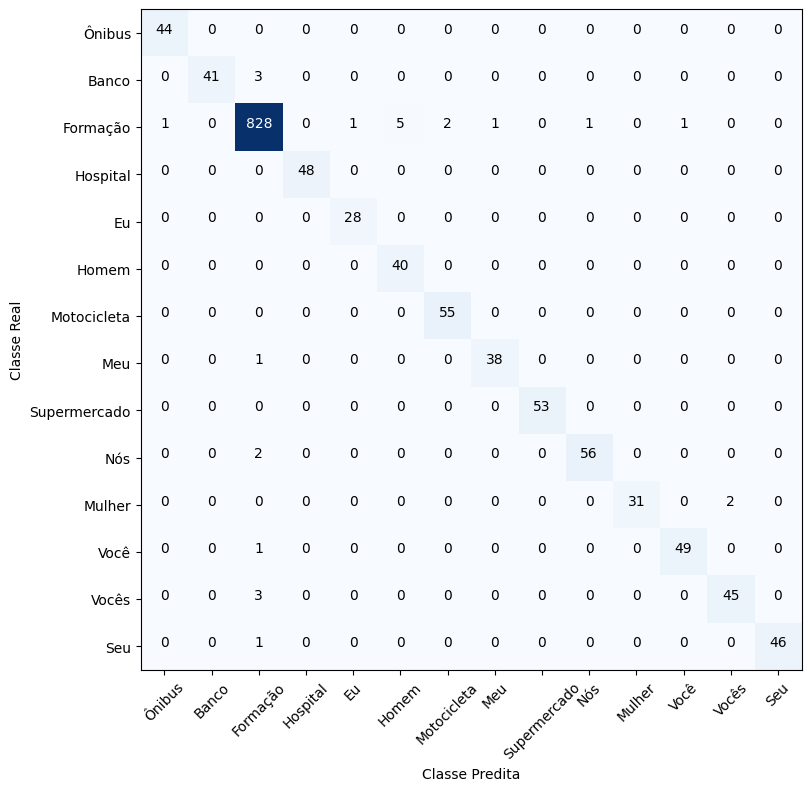

In [18]:
plt.figure(figsize= (8,8))
plot_confusion_matrix(cm_modificado, classes=['Ônibus', 'Banco', 'Formação', 'Hospital', 'Eu', 'Homem', 'Motocicleta', 'Meu', 'Supermercado', 'Nós', 'Mulher', 'Você', 'Vocês', 'Seu']
)
plt.show()

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(preds, axis=1))
print("Acurácia: {:.2f}%".format(accuracy * 100))

precision = precision_score(np.argmax(y_test, axis=1), np.argmax(preds, axis=1), average='macro')
print("Precisão: {:.2f}%".format(precision * 100))

recall = recall_score(np.argmax(y_test, axis=1), np.argmax(preds, axis=1), average='macro')
print("Recall: {:.2f}%".format(recall * 100))

f1Score = f1_score(np.argmax(y_test, axis=1), np.argmax(preds, axis=1), average='macro')
print("F1 Score: {:.2f}%".format(f1Score * 100))


Acurácia: 98.04%
Precisão: 91.03%
Recall: 91.29%
F1 Score: 91.11%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


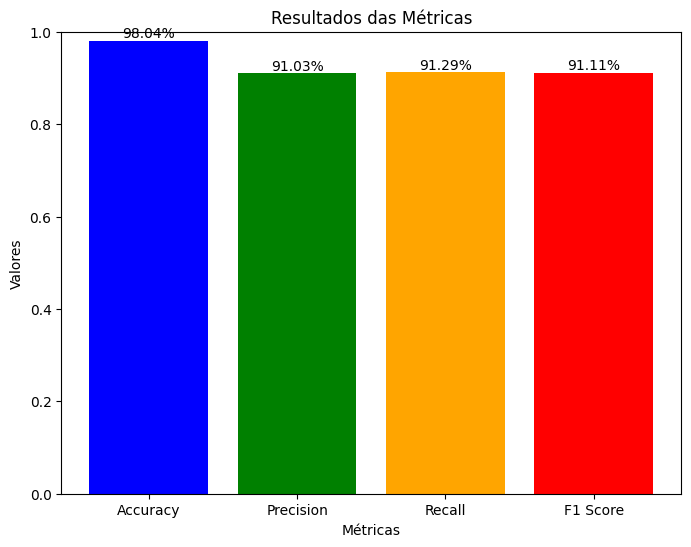

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Supondo que y_test e preds são seus dados
y_test = np.array(y_test)
preds = np.array(preds)

# Cálculo das métricas
accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(preds, axis=1))
precision = precision_score(np.argmax(y_test, axis=1), np.argmax(preds, axis=1), average='macro')
recall = recall_score(np.argmax(y_test, axis=1), np.argmax(preds, axis=1), average='macro')
f1Score = f1_score(np.argmax(y_test, axis=1), np.argmax(preds, axis=1), average='macro')

# Nomes das métricas
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Valores das métricas
values = [accuracy, precision, recall, f1Score]

# Criando o gráfico
plt.figure(figsize=(8,6))
bars = plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])

# Adicionando os valores em cima das colunas
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '{:.2f}%'.format(height * 100),
             ha='center', va='bottom')

plt.xlabel('Métricas')
plt.ylabel('Valores')
plt.title('Resultados das Métricas')
plt.ylim(0, 1)  # Definindo o limite do eixo y entre 0 e 1
plt.show()
